# Some small Classification problems

## 1. Banknote classification with fully connected neural networks

**Goal:** In this notebook you will do your first classification. You will see that fully connected networks without a hidden layer can only learn linar decision boundaries, while fully connected networks with hidden layers are able to learn non-linear decision boundaries.

**Usage:** The idea of the notebook is that you try to understand the provided code. Run it, check the output, and play with it by slightly changing the code. 

**Dataset:** You work with a banknote data set and classification task. We have 5 features of wavelet transformed images of banknotes:
>1. variance  (continuous feature) 
>2. skewness (continuous feature) 
>3. curtosis (continuous feature) 
>4. entropy (continuous feature) 
>5. class (binary indicating if the banknote is real or fake)  

Don't bother too much how these features exactely came from.

For this analysis we only use 2 features. 

>x1: skewness of wavelet transformed image  
>x2: entropy of wavelet transformed image


**The goal is to classify each banknote to either "real" (Y=0) or "fake" (Y=1).**


**Content:**
* visualize the data in a simple scatter plot and color the points by the class label
* use the Keras library to build a fcNN without hidden layers (logistic regression). Use SGD with the objective to minimize the crossentropy loss. 
* visualize the learned decision boundary in a 2D plot
* use the Keras library to build a fcNN with a single hidden layer. Use SGD with the objective to minimize the crossentropy loss. 
* visualize the learned decision boundary in a 2D plot
* compare the performace and the decision boundaries of the two models
* stack more hidden layers to the model and playaround with the epochs

#### Imports

In the next two cells, we load all the required libraries and functions from keras and numpy. We also download the data with the 5 featues from the provided url.

In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [2]:
# Load data from url
from urllib.request import urlopen
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)

(1372, 5)


Let's extract the two featues *x1: skewness of wavelet transformed image* and *x2: entropy of wavelet transformed image*. We print the shape and see that we for X  we have 1372 oberservations with two featues and for Y there are 1372 binary labels.

In [3]:
# Here we use extract the two features and the label of the dataset
X=dataset[:,[1,3]] # Extract skewness and entropy
Y=dataset[:,4]
print(X.shape)
print(Y.shape)

(1372, 2)
(1372,)


Since the banknotes are described by only 2 features, we can easily visualize the positions of real and fake banknotes in the 2D feature space. You can see that the boundary between the two classes is not separable by a straight line. A curved boundary line will do better. But even then we cannot expect a perfect seperation.


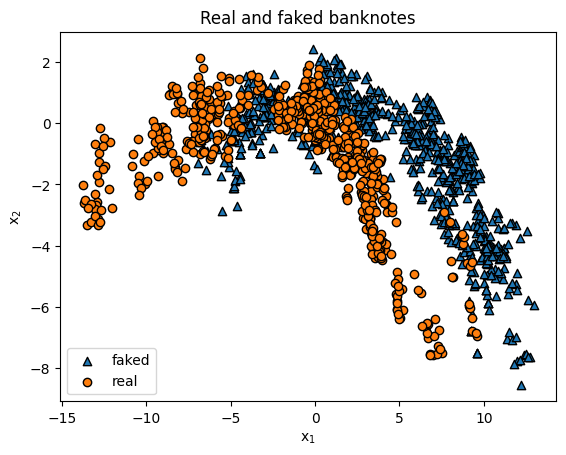

In [4]:
# visualize the data in a 2D feature space. 
idx_f = [np.where(Y==1)]
idx_r = [np.where(Y==0)]
params = {'mathtext.default': 'regular' }  #Nicer Plotting (Latex Style)
plt.rcParams.update(params)
plt.scatter(X[idx_r,0],X[idx_r,1], alpha=1.0,marker='^',edgecolor='black')
plt.scatter(X[idx_f,0],X[idx_f,1], alpha=1.0,marker='o',edgecolor='black')
plt.title("Real and faked banknotes")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(("faked","real"),
           loc='lower left',
           fontsize=10)
plt.show()

## fcNN with only one neuron
Let’s try to use a single neuron with a sigmoid activation function (also known as logistic regression) as classification model to seperate the banknotes.  
We use the sequential API from keras to build the model. To fit the 3 parameters we use the stochastic gradient descent optimizer with a learning rate of 0.15.

### Definition of a NN with only one neuron after the input


In [5]:
# Definition of the network
model = Sequential()                                        # starts the definition of the network
model.add(Dense(1, batch_input_shape=(None, 2),             # adds a new layer to the network with a single neuron  
                activation='sigmoid'))                      # The input is a tensor of size (batch_size, 2), since we don’t specify the Batch Size now, we use None as a placeholder
                                                            # chooses the activation function ‘sigmoid’
# Definition of the optimizer
sgd = optimizers.SGD(lr=0.15)                               # Defining the stochastic gradient descent optimizer

# compile model                                             # compile model, which ends the definition of the model 
model.compile(loss='binary_crossentropy',
              optimizer=sgd,                                # using the stochastic gradient descent optimizer
              metrics=['accuracy'])

In [6]:
# summarize the architecture of the NN along with the number of weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In the next cell, we train the network. In other words, we tune the parameters that were initialized randomly with stochastic gradient descent to minimize our loss function (the binary corssentropy). We set the batchsize to 128 per updatestep and train for 400 epochs.

In [7]:
# Training of the network
history = model.fit(X, Y,                           # training of the model using the training data stored in X and Y for 4100 epochs
          epochs=400,                               # for 400 epochs
          batch_size=128,                           # fix the batch size to 128 examples
          verbose=0)


Let's look at the so called leraning curve, we plot the accuracy and the loss vs the epochs. You can see that after 100 epochs, we predict around 70% of our data correct and have a loss aorund 0.51 (this values can vary from run to run).

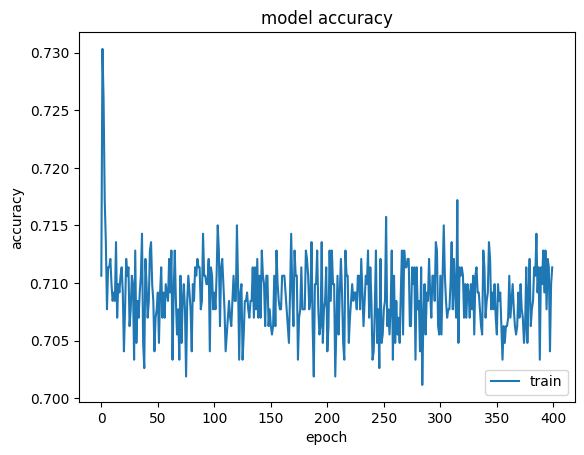

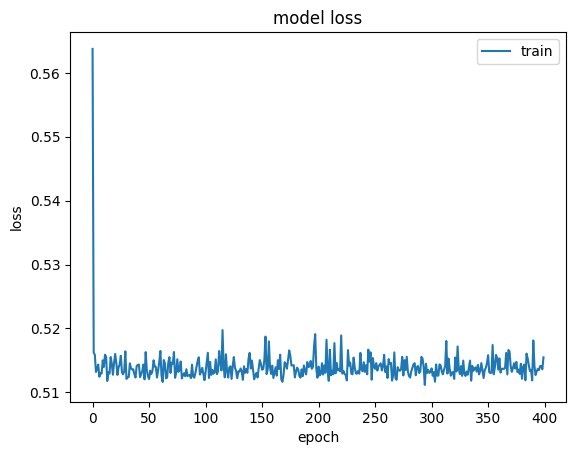

In [8]:
# plot the development of the accuracy and the loss during the training
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### Plotting the learned decision boundary
Let's visualize which decision boundary was learned by the fcNN with only one output neuron (and no hidden layer).  
As you can see the decision boundary is a straight line. This is not a coincidence but a general property of a single artificial neuron with a sigmoid as activation function and no hidden layer, also known as logistic regression.


(400, 1, 1)


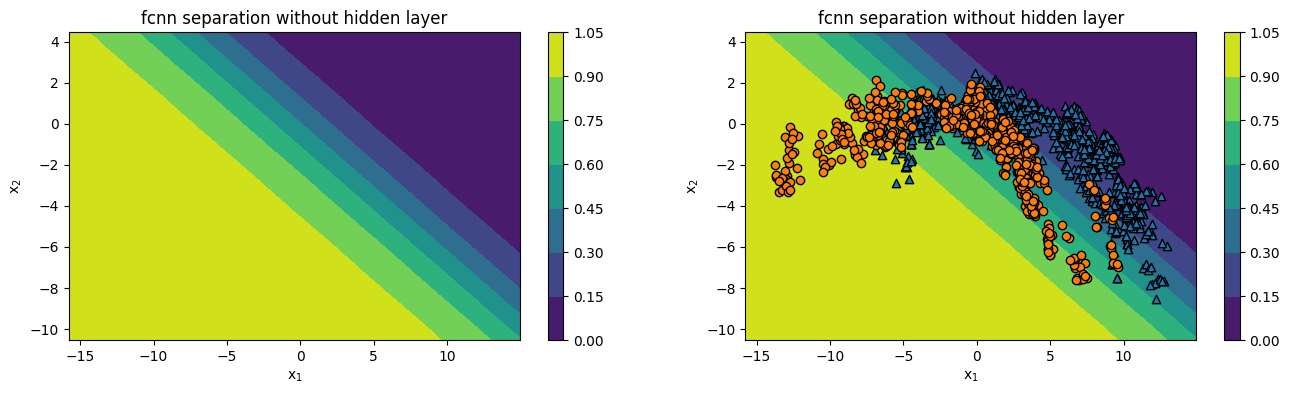

In [9]:
def plotModel(X,Y, model, t):
    # define a grid for the 2D feature space
    # predict at each grid point the probability for class 1

    x1list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 20) # Define 50 points on the x-axis
    x2list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 20) # Define 50 points on the x-axis
    X1_grid, X2_grid = np.meshgrid(x1list, x2list)

    # model.predict for respective value x1 and x2 
    p = np.array([model.predict(np.reshape(np.array([l1,l2]),(1,2))) for l1,l2 in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
    print(p.shape)
    if len(p.shape) == 3 and p.shape[2]==2:
        p = p[:,:,1] # pick p for class 1 if there are more than 2 classes
    p = np.reshape(p,X1_grid.shape)

    # visualize the predicted probabilities in the 2D feature space
    # once without and once with the data points used for fitting
    params = {'mathtext.default': 'regular' }  #Nicer Plotting
    plt.rcParams.update(params)
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,(1))
    cp = plt.contourf(X1_grid, X2_grid, p,cmap='viridis')
    plt.colorbar(cp)
    plt.title(t)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

    plt.subplot(1,2,(2))
    cp = plt.contourf(X1_grid, X2_grid, p,cmap='viridis')
    plt.colorbar(cp)
    idx_f = [np.where(Y==1)]
    idx_r = [np.where(Y==0)]
    plt.scatter(X[idx_r,0],X[idx_r,1], alpha=1.0,marker='^',edgecolor='black')
    plt.scatter(X[idx_f,0],X[idx_f,1], alpha=1.0,marker='o',edgecolor='black')
    plt.title(t)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

plotModel(X, Y, model, 'fcnn separation without hidden layer')

## fcNN with one hidden layer 

We know that the boundary between the two classes is not descriped very good by a line. Therefore a single neuron is not appropriate to model the probability for a fake banknote based on its two features. To get a more flexible model, we introduce an additional layer between input layer and output layer. This is called hidden layer. Here we use a hidden layer with 8 neurons. We also change the ouputnodes form 1 to 2, to get two ouputs for the probability of real and fake banknote. Because we now have 2 outputs, we use the *softmax* activation function in the output layer. The softmax activation ensures that the output can be interpreted as a probability (see book for details)

### Definition of the network with two hidden layers                                                                                                                     

In [10]:
# Definition of the network
model = Sequential()
model.add(Dense(8, batch_input_shape=(None, 2),activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In this is output summary we see that we now have a lot more trainable paramters then before.  
24 = inputdim · outpuntdim + outputbias= 2 · 8 + 8   
18 = inputdim · outpuntdim + outputbias= 8 · 2 + 2   

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Transforms Y=0 to (1,0) and Y=1 to (0,1)
Y_c=to_categorical(Y,2)
Y[0:5], Y_c[0:5],Y[-5:-1],Y_c[-5:-1]

(array([0., 0., 0., 0., 0.]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 array([1., 1., 1., 1.]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

In the next cell, train the network. In other words, we tune the parameters that were initialized randomly with stochastic gradient descent to minimize our loss function (the categorical crossentropy). We set the batchsize to 128 per updatestep and train for 400 epochs.

In [13]:
# Training of the network
history = model.fit(X, Y_c, 
          epochs=400, 
          batch_size=128,
          verbose=0)

Let's look again at the leraning curve, we plot the accuracy and the loss vs the epochs. You can see that after 100 epochs, we predict around 86% of our data correct and have a loss aorund 0.29 (this values can vary from run to run). This is already alot better than the model without a hidden layer.

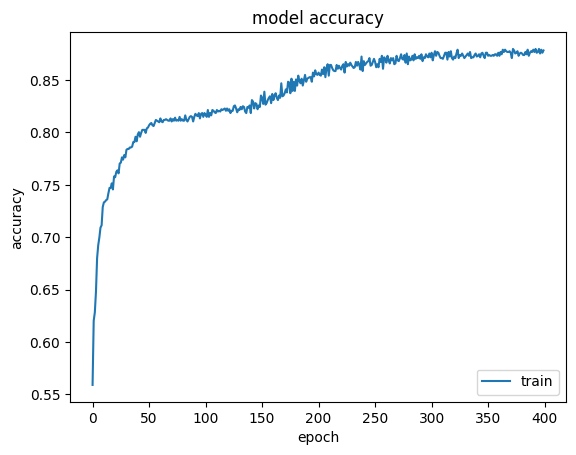

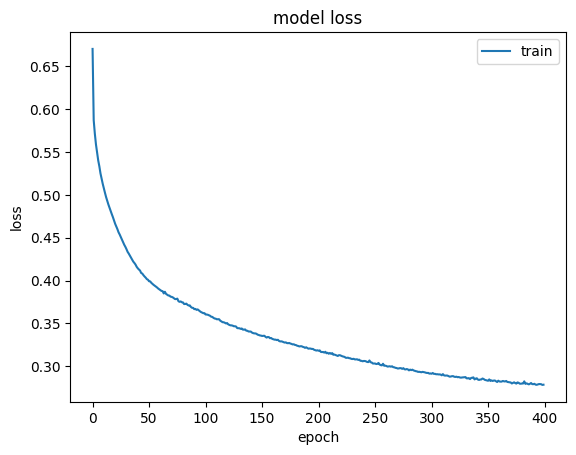

In [14]:
# plot the development of the accuracy and loss during the training
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()


### Plotting the learned decision boundary
Let's visualize which decision boundary was learned by the fcNN with the hidden layer
As you can see the decision boundary is a now curved and not straight anymore. The model (with the hidden layer in the middle) separates the the two classes in the training data better and is able to learn non-linear decision boundaries. 



(400, 1, 2)


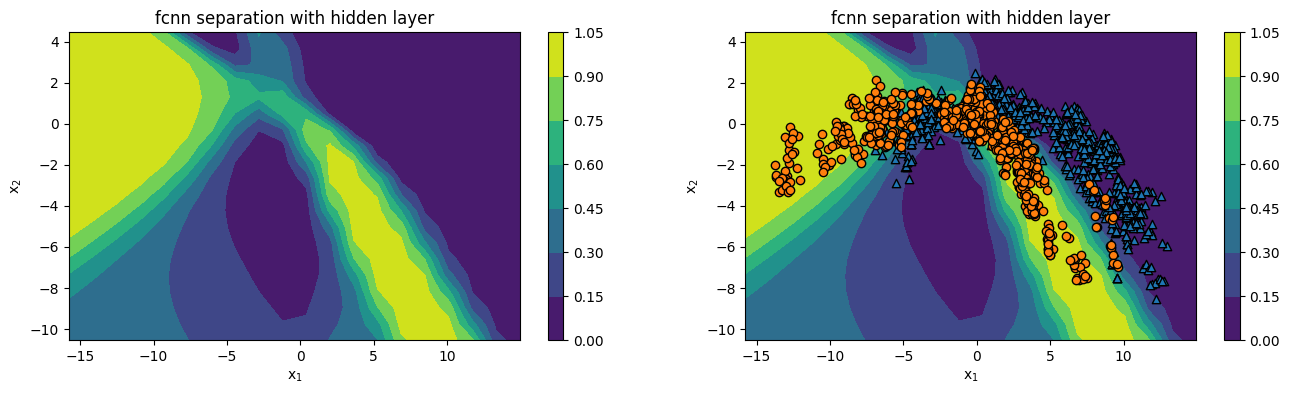

In [15]:
plotModel(X,Y,model, 'fcnn separation with hidden layer')

#### Add more hidden layers and play around with the training epochs
<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  

**Exercise**: 

       1. Add more hidden layers to the model and play around with the training epochs. What do you observe? Look at the learned decision boundary. How does the loss and the accuracy change?
       2. Use different features for classification. What do you think which features are best to classify real and fake banknotes?



# 2. A simple CNN for the edge lover task

**Goal:** In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical from those containing horizontal stripes. To check what pattern is recognized by the learned kernel you will visualize the weights of the kernel as an image. You will see that the CNN leans a useful kernel (either a vertical or horiziontal bar).You can experiment with the code to check the influence of the kernel size, the activation function and the pooling method on the result.  

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it.  

**Dataset:** You work with an artficially generatet dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars. We want to classify them into whether or not an art lover will like them(0 or 1).  

**Content:**
* defining and generating the dataset X_train and X_val
* visualize samples of the generated images
* use keras to train a CNN with only one kernel (5x5 pixel)
* visualize the weights of the leaned kernel and interpret if it is useful
* repeat the last two steps to check if the learned kernel is always the same


In [16]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 

### Defining functions to generate images 

Here we define the function to genere images with vertical and horizontal bars, the arguments of the functions are the size of the image and the nr of bars you want to have. The bars are at random positions in the image with a random length. The image is black and white, meaning we have only two values for the pixels, 0 for black and 255 for white.

In [17]:
#define function to generate image with shape (size, size, 1) with stripes
def generate_image_with_bars(size, bar_nr, vertical = True):
    img=np.zeros((size,size,1),dtype="uint8")
    for i in range(0,bar_nr):
        x,y = np.random.randint(0,size,2)
        l  = np.int(np.random.randint(y,size,1))
        if (vertical):
            img[y:l,x,0]=255
        else:
            img[x,y:l,0]=255
    return img  

Let's have a look how the generated images. We choose a size of 50x50 pixels and set the nr of bars in the image to 10. 

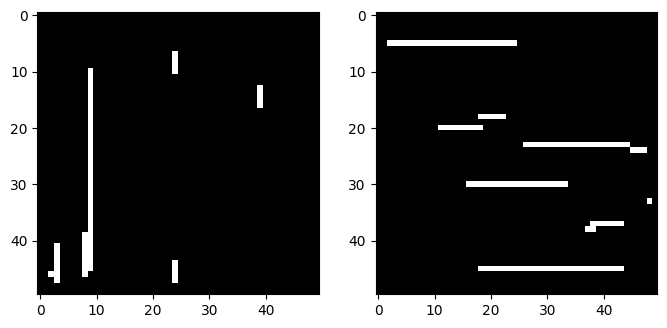

In [18]:
# have a look on two generated images
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
img=generate_image_with_bars(50,10, vertical=True)
plt.imshow(img[:,:,0],cmap='gray')
plt.subplot(1,2,2)
img=generate_image_with_bars(50,10, vertical=False)
plt.imshow(img[:,:,0],cmap='gray')

### Make a train and validation dataset of images with vertical and horizontal images
Now, let's make a train dataset *X_train* with 1000 images (500 images with vertical and 500 images with horizontal bars). We normalize the images values to be between 0 and 1 by dividing all values with 255. We create a secont dataste *X_val* with exactly the same properties to validate the training of the CNN.

In [19]:
pixel=50  # define height and width of images
num_images_train = 1000 #Number of training examples (divisible by 2) 
num_images_val = 1000 #Number of training examples (divisible by 2) 

# generate training data with vertical edges
X_train =np.zeros((num_images_train,pixel,pixel,1))
for i in range(0, num_images_train//2):
    X_train[i]=generate_image_with_bars(pixel,10)
# ... with horizontal
for i in range(num_images_train//2, num_images_train):
    X_train[i]=generate_image_with_bars(pixel,10, vertical=False)

# generate validation data 
X_val =np.zeros((num_images_train,pixel,pixel,1))
for i in range(0, num_images_train//2): 
    X_val[i]=generate_image_with_bars(pixel,10)
# ... with horizontal
for i in range(num_images_train//2, num_images_train):
    X_val[i]=generate_image_with_bars(pixel,10, vertical=False)


# normalize the data to be between 0 and 1
X_train=X_train/255
X_val=X_val/255

print(X_train.shape)
print(X_val.shape)

(1000, 50, 50, 1)
(1000, 50, 50, 1)


Here we make the labels for the art lover, 0 means he likes the image and 1 means that he doesn't like it. We convert the labels into the one hot encoding becuase we want to use two outputs in our network.

In [20]:
# create class labels
y = np.array([[0],[1]])
Y_train = np.repeat(y, num_images_train //2)
Y_val = np.repeat(y, num_images_train //2)

# one-hot-encoding
Y_train=to_categorical(Y_train,2)
Y_val=to_categorical(Y_val,2)

## Defining the CNN to predict which images the art lover likes

Here we define the kind of special architecture of the CNN: 

>we use only one kernel with a size of 5x5 pixels  
>then we apply a linar activation function  
>the maxpooling layer takes the maximum of the whole activation map to predict the probability (output layer with softmax) if the art lover will like the image

as loss we use the categorical_crossentropy and we train for 20 epochs with a batchsize of 64 images per update.


#### Listing 2.5 Edge lover CNN                                                                                                                      

In [21]:
model = Sequential()

model.add(Convolution2D(1,(5,5),padding='same',input_shape=(pixel,pixel,1)))
model.add(Activation('linear'))

# take the max over all values in the activation map
model.add(MaxPooling2D(pool_size=(pixel,pixel)))
model.add(Flatten()) 
model.add(Dense(2))
model.add(Activation('softmax'))

# compile model and initialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [22]:
# let's summarize the CNN architectures along with the number of model weights
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 1)         26        
_________________________________________________________________
activation (Activation)      (None, 50, 50, 1)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 4         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 30
Trainable params: 30
Non-trainable params: 0
__________________________________________________________

In [23]:
# train the model
history=model.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 

Epoch 1/50
16/16 [==============================] - 1s 48ms/step - loss: 0.6963 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 1s 41ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 1s 41ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 1s 42ms/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 5/50
16/16 [==============================] - 1s 41ms/step - loss: 0.6884 - accuracy: 0.5000 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 1s 41ms/step - loss: 0.6821 - accuracy: 0.5000 - val_loss: 0.6770 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 1s 42ms/step - loss: 0.6714 - accuracy: 0.5000 - val_loss: 0.6648 - val_accuracy: 0.5000
Epoch 8/50
16

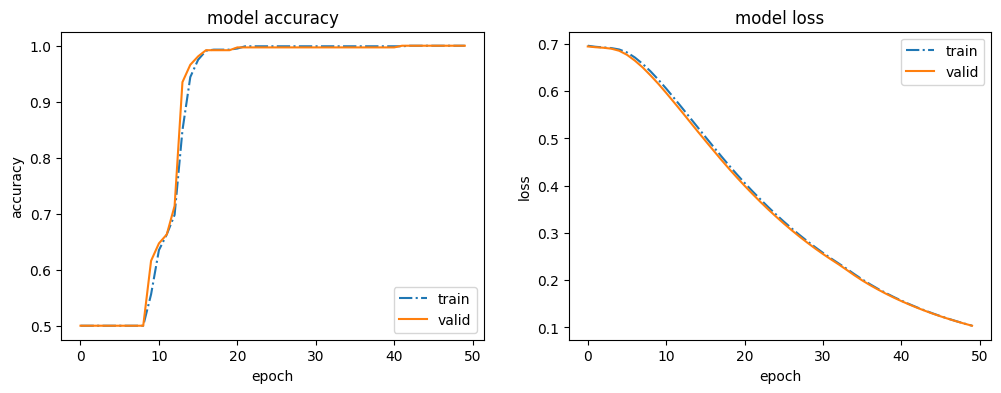

In [24]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

### Visualize the learned kernel and experiment with the code

You see that the CNN performs very good at this task (100% accuracy). We can check which pattern is recognized by the learned kernel and see if you think that this is helpful to distinguish between images with horizontal and vertical edges. 


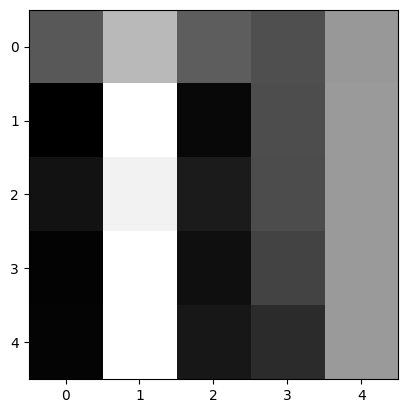

In [25]:
# get the leared weights and display them as image
conv_filter=model.get_weights()[0]
conv_filter.shape
conv_filter=np.squeeze(conv_filter, axis=2)
plt.imshow(conv_filter[:,:,0],"gray")

Lets look what this learned kernel actually does by trying it out on a picture!

(5, 5)
[[-0.22330952 -0.7769198  -0.66107184 -0.75263304 -0.7517446 ]
 [ 0.37933648  0.8180226   0.7340419   0.81772697  0.81811076]
 [-0.19414562 -0.72269225 -0.6053123  -0.6822629  -0.631469  ]
 [-0.28468373 -0.29203942 -0.30111527 -0.35790423 -0.50544107]
 [ 0.17134222  0.187438    0.18732616  0.18698594  0.18742879]]


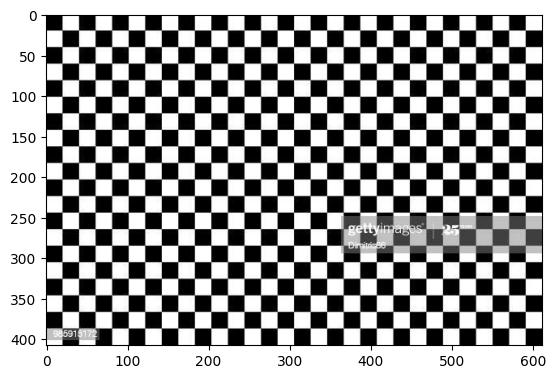

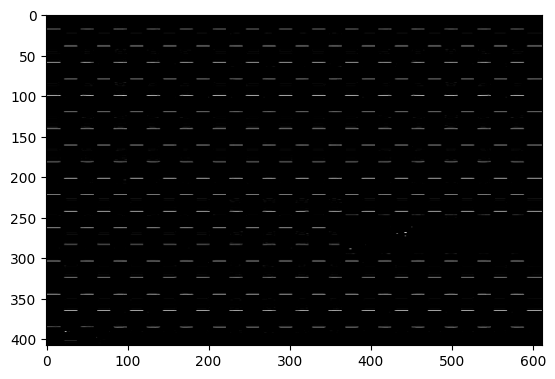

In [26]:
import sys
import cv2 as cv2
# Loads an image
src = cv2.imread('Pictures/schach.png', cv2.IMREAD_COLOR)
# Check if image is loaded fine
plt.figure(1)
plt.imshow(src)
ddepth = -1

ind = 0

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
print(kernel.shape)
kernel = conv_filter.T
kernel = kernel.squeeze(axis=0)
#kernel /= (kernel_size * kernel_size)
print(kernel)
dst = cv2.filter2D(src, -1, kernel)


plt.figure(2)
plt.imshow(dst)



#### Repeat the training and exerpiment with the kernelsize and activation function.<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />

**Exercise:** Repeat the compiling and training for several times and check if the CNN always learns the same kernel.  
You can experiment with the code and check what happens if you use another kernel size, activation function (relu instead of linear ) or pooling method AveragePooling instead of MaxPooling.  
Try to make a prediction before doing the experiment.*




Credit: https://tensorchiefs.github.io/dl_book/

with the two Notebooks taken:

Banknotes: https://github.com/tensorchiefs/dl_book/blob/master/chapter_02/nb_ch02_01.ipynb

Edgelover: https://github.com/tensorchiefs/dl_book/blob/master/chapter_02/nb_ch02_03.ipynb